# PV Simulation

The OpenEnergyID Module "PV Simulation" is a tool that helps you simulate a PV plant.

### Imports

In [1]:
import aiohttp
import typing

from openenergyid.pvsim import get_simulator
from openenergyid.pvsim.pvlib import PVLibSimulationInput, PVLibSimulator
from openenergyid.pvsim.elia import EliaPVSimulationInput

# PVLib QuickScan

The PVLib QuickScan provides a simplified interface to the PVLib library. Some "sensible defaults" are used to make it easier to use the library, and get a quick simulation of a PV plant.

The weather data used to perform this simulation is based on a _normal_ year for the location of the PV plant, therefore the results are not representative for a specific year.

In [2]:
simulation_parameters = {
    "modelchain": {
        "system": {
            "surface_tilt": 35,  # degrees from horizontal
            "surface_azimuth": 180,  # degrees from north
            "modules_per_string": 6,  # number of modules in series
            "p_inverter": 2000,  # Power inverter in W
            "p_module": 435,  # Power per module in Wp
        },
        "location": {"latitude": 51.2, "longitude": 4.4, "tz": "Europe/Brussels"},  # Antwerp
        "type": "quickscan",
    },
    "start": "2025-01-01",  # Simulation start date
    "end": "2025-02-01",  # Simulation end date
}

input_ = PVLibSimulationInput.model_validate(simulation_parameters)
simulator = typing.cast(PVLibSimulator, get_simulator(input_))
await simulator.load_resources()

print(simulator.simulation_results.sum())

93.2430494262343


<Axes: xlabel='timestamp', ylabel='kWh'>

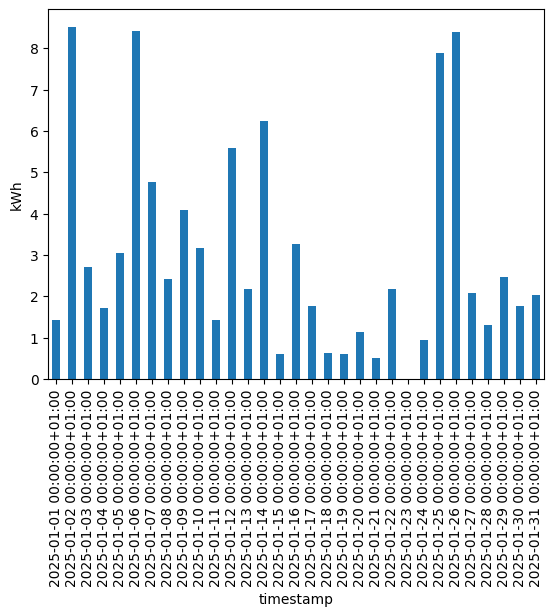

In [3]:
simulator.simulation_results.resample("D").sum().plot.bar(ylabel="kWh")

# Elia PV Simulation

This simulation takes the published load factors from Elia and uses them to simulate a PV plant.

The load factors are based on historical data and are representative for a specific year.

In [4]:
simulation_parameters = {
    "start": "2025-01-01",
    "end": "2025-02-01",
    "region": "Antwerp",
    "panel_power": 2610,  # Wp
    "inverter_power": 2000,  # W
}
input_ = EliaPVSimulationInput.model_validate(simulation_parameters)
simulator = get_simulator(input_)

async with aiohttp.ClientSession() as session:
    await simulator.load_resources(session=session)

print(simulator.simulation_results.sum())

46.252938825


<Axes: ylabel='kWh'>

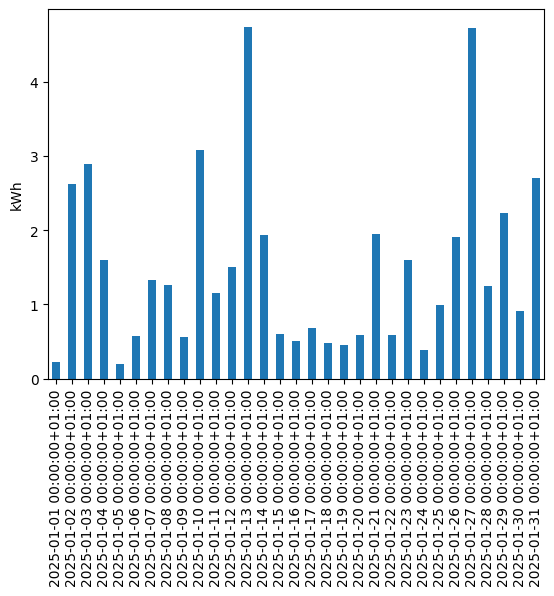

In [5]:
simulator.simulation_results.resample("D").sum().plot.bar(ylabel="kWh")